# Определение стоимости автомобилей

Цель данной работы - разработать модель для предсказания рыночной стоимости автомобиля, на основании исторические данные: технические характеристики, комплектации и цены автомобилей, для разрабатываемого приложения  сервисом по продаже автомобилей с пробегом «Не бит, не крашен», которое будет использоваться для привлечения новых клиентов.
Необходимо построить модель для определения стоимости автомобиля. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<h1>Содержание<span class="tocSkip"></span></h1>

1. [Загрузка и подготовка данных](#старт)
    - 1.1.[Импорт библиотек](#библиотека)
    - 1.2.[Загрузка и изучение данных](#данные)
        - 1.2.1.[Вывод](#вывод1.1)
    - 1.3. [Анализ признаков](#признак)
    - 1.4.[Предобработка данных](#предобработка)
        - 1.4.1.[Вывод](#вывод1.4)
    - 1.5.[Подготовка данных для работы с моделями](#обработка)
2.[Обучение моделей](#обучение)
    - 2.1.[Вывод](#вывод2.1)
    - 2.2.[Подбор параметров](#параметр)
3.[Анализ моделей](#анализ)
    - 3.1.[Проверяем на тестовых данных](#тест)
    - 3.2.[Проверяем на полных данных](#массив)
4.[Вывод](#вывод)  
5.[Чек-лист готовности проекта](#лист)

## Подготовка данных
<a id="старт"></a>

### Импорт библиотек 
<a id="библиотека"></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore')# Игнорировать все предупреждения

import pandas as pd# импорт библиотеки pandas
import numpy as np #Импорт модуля numpy. numpy работает с однородными многомерными массивами (матрицами)

import matplotlib.pyplot as plt#Импорт модуля matplotlib
import seaborn as sns# импорт seaborn
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split # функция  для разделения датасет на данные для обучения и тестирования
#from sklearn.preprocessing import StandardScaler # импортируем StandardScaler из библиотеки sklearn
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression # импортируем LinearRegression из библиотеки sklearn
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import os
import time

from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyRegressor

### Загрузка и изучение данных
<a id="данные"></a>

In [2]:
df = pd.read_csv('/datasets/autos.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


Проверим данные на наличие дупликатов.

In [4]:
df.duplicated().sum()

4

Удалим выявленные дупликаты и проверим результат.

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365.0,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989,5.714650,0.0,50508.503800
std,4514.176349,90.228466,189.851330,37905.083858,3.726432,0.0,25783.100078
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


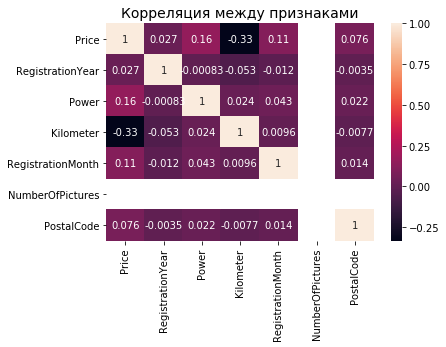

In [8]:
plt.title('Корреляция между признаками', size=14)
hm = sns.heatmap(df.corr(),
                 cbar=True,
                 annot=True)

#### Вывод
<a id="вывод1.1"></a>

В исходном датафрейме: 6 столбцов (9 из них — качественные, а 7 — количественные) , 354369  объектов. Тип данных представлен: int64 - 7 шт, object - 9 шт.
Датафрейм df содержит следующие столбцы:
Признаки:
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* NotRepaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя
и целевой признак:
* Price  - цена (евро)

Пропущенные значения выявлены: VehicleType - 37490 шт, Gearbox - 19833 шт, Model - 19705 шт, FuelType - 32895 шт, NotRepaired - 71154 шт. Необходимо проанализировать и решить, что делать с пропущенными значениями.

Столбецы DateCrawled, DateCreated, NumberOfPictures, PostalCode, LastSeen можно удалить, для предсказания стоимости автомобиля эта информация значения не имеет.

В RegistrationMonth значение равное нулю трогать не будем, примем это метку - отсутствие данных.

Столбецы RegistrationYear и Power проверить на выборосы.

Выявлена отрицательная корреляция между целевым признаком Price  и Kilometer, коэффициент Пирсона равен -0,33.

### Анализ признаков
<a id="признак"></a>

Удалим столбцы, которые не несут существенной информации для определения стоимости автомобиля

In [9]:
df_new=df.drop(['DateCrawled','DateCreated','NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)

Визуализируем распределение целевого признака и признаков: RegistrationYear и Power.

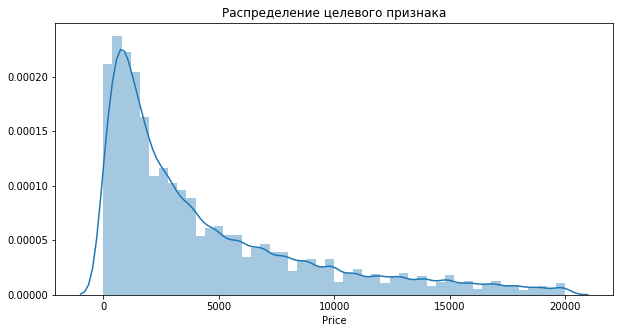

In [10]:
plt.figure(figsize=(10,5))
plt.title('Распределение целевого признака')
sns.distplot(df_new['Price'])

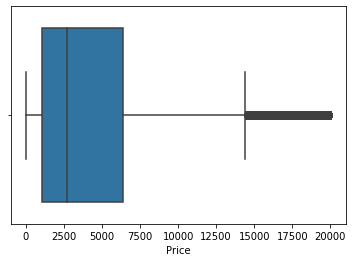

In [11]:
sns.boxplot(df_new['Price'])

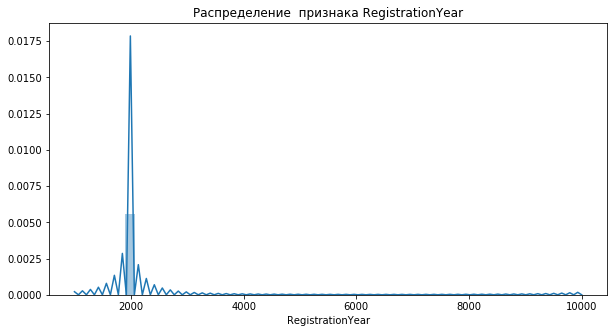

In [12]:
plt.figure(figsize=(10,5))
plt.title('Распределение  признака RegistrationYear')
sns.distplot(df_new['RegistrationYear'])

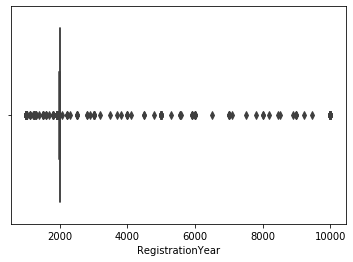

In [13]:
sns.boxplot(df_new['RegistrationYear'])

Могут быть раритетные автомобили и их удалять мы не можем. Так же автомобиль не может быть с годом превышающий нынешний год. 
Объектов с годом регистрации старше 1900г выявлено 66 объектов,  с превышающим 2021 года - 105 шт. 
Поэтому отсекаем все года до 1900 и после 2021.
Эти данные удаляем, т.к. они являются выбросами и будут только мешать работе модели.

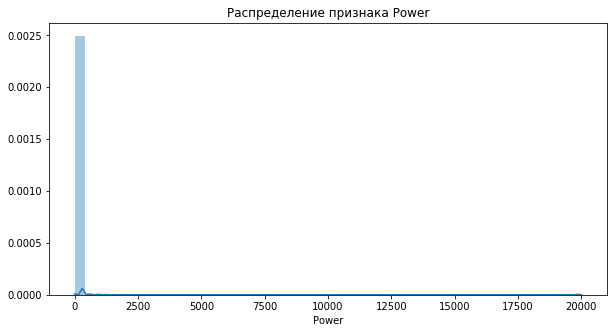

In [14]:
plt.figure(figsize=(10,5))
plt.title('Распределение признака Power')
sns.distplot(df_new['Power'])

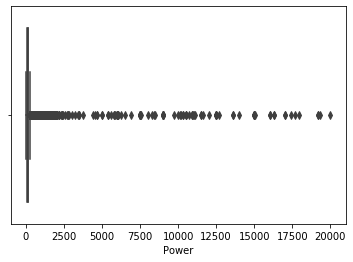

In [15]:
sns.boxplot(df_new['Power'])

Со скоростью сложнее. Скорость автомобиля выше 4500 л.с. быть не может. (эта скорость эксклюзивного авто, и в массовым сектором не является.) Первая серийная машина мощностью две тысячи лошадиных сил. Это Lotus Evija.
Обычная скорость автомобиля не превышает 1000 л.с. Есть два пути: первый удалить данные, которые неявляются правильными, второе привести их в порядок, т.к. скорее всего здесь проблема с ноликами на конце. Диапозон от 1000 до 10000 уменьшить в 10 раз, выше 10000 уменьшить в 100 раз.

In [16]:
for i in df_new['Brand'].unique ():
    df_new.loc[(df_new['Power'] > 1000) & (df_new['Brand'] == i), 'Power'] = df_new.loc[(df_new['Brand'] == i)]['Power'].mean()

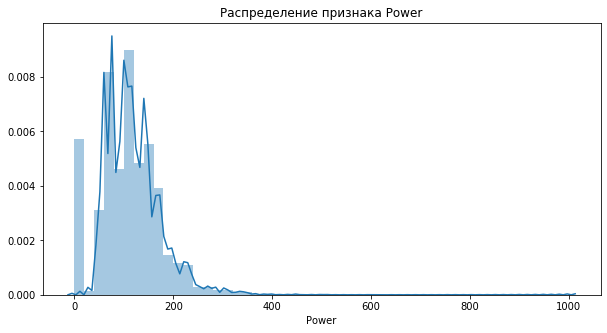

In [17]:
plt.figure(figsize=(10,5))
plt.title('Распределение признака Power')
sns.distplot(df_new['Power'])

Сформируем новую таблицу df_new  без выявленных выбросов.

In [18]:
df_new = df_new.query('1900 < RegistrationYear < 2021 & 50 <  Power & RegistrationMonth > 0')

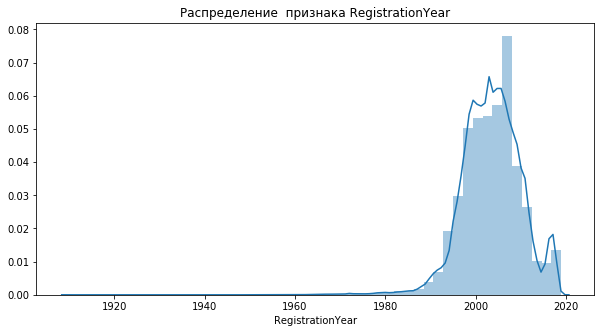

In [19]:
plt.figure(figsize = (10,5))
plt.title('Распределение  признака RegistrationYear')
sns.distplot(df_new['RegistrationYear'])

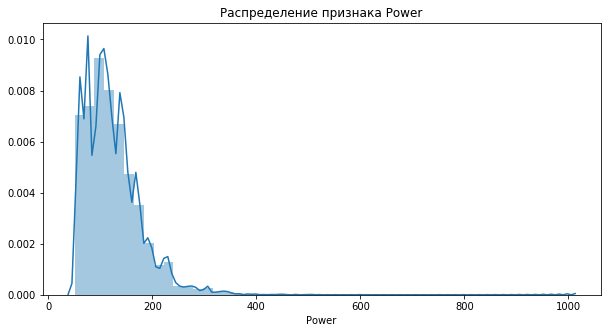

In [20]:
plt.figure(figsize = (10,5))
plt.title('Распределение признака Power')
sns.distplot(df_new['Power'])

### Предобработка данных
<a id="предобработка"></a>

Определим количество строк, в которых встречается одновременно пропущенные значения в столбцах: VehicleType, NotRepaired, Gearbox, FuelType и Model.

In [21]:
df.loc[(df['VehicleType'].isnull()) & (df['NotRepaired'].isnull()) & (df['Gearbox'].isnull()) & (df['FuelType'].isnull()) & (df['Model'].isnull())].shape
#эти строчки удаляем

(2237, 16)

Выявлено 2237 строк, где одновременно отсутствует данные, поэтому эти строки мы удаляем.

In [22]:
df_new.drop(df_new.loc[(df['VehicleType'].isnull())&(df_new['NotRepaired'].isnull())&(df_new['Gearbox'].isnull())&(df_new['FuelType'].isnull())&(df_new['Model'].isnull())].index, inplace=True)

Сделаем копию таблицы df_new.

In [23]:
df_new_nan = df_new.copy()

Все пропущенные значения находятся в столбцах с типом данных "объект", поэтому эти пропущенные значения можно заменить на значение  'unknown', потому что не всегда в жизни бывают известны все данные и это приблизит нашу модель к реалиям жизни.

In [24]:
df_new_nan = df_new_nan.fillna('unknown')

Проверим наличие пропущенных значений в таблице после замены их на 'unknown'.

In [25]:
df_new_nan.isnull().sum()

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
dtype: int64

Признаки относящиеся к типу данных "object" переведем в численный тип, т.е закодируем их.
Воспользуемся частотным кодированием - этот способ использует частоту категорий в качестве меток. В тех случаях, когда частота связана с целевой переменной, это помогает модели понять и назначить вес в прямой и обратной пропорции, в зависимости от характера данных.

In [26]:
df_new_nan = df_new_nan.copy()
df_new_categ = df_new_nan.copy()

Напишем функцию для частотного кодирования.

In [27]:
def cod_type(col):    
     return df_new_nan[col].map(df_new_nan.groupby(col).size()/len(df))

In [28]:
df_new_nan.loc[:,'VehicleType_freq'] = cod_type('VehicleType')

In [29]:
df_new_nan.loc[:,'Model_freq'] = cod_type('Model')

In [30]:
df_new_nan.loc[:,'FuelType_freq'] = cod_type('VehicleType')

In [31]:
df_new_nan.loc[:,'Brand_freq'] = cod_type('FuelType')

In [32]:
df_new_nan.loc[:,'NotRepaired_freq'] = cod_type('Brand')

In [33]:
df_new_nan.loc[:,'Gearbox_freq'] = cod_type('NotRepaired')

Удалим не нужные столбцы, оставим закодированные, а те которые имеют тип "object" - удалим.

In [34]:
df_new_nan_final=df_new_nan.drop(['VehicleType','Model','FuelType', 'Brand', 'Gearbox', 'NotRepaired'], axis=1)

Проверим, что получилось.

In [35]:
df_new_nan_final

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_freq,Model_freq,FuelType_freq,Brand_freq,NotRepaired_freq,Gearbox_freq
1,18300,2011,190.0,125000,5,0.038898,0.027599,0.038898,0.244767,0.071218,0.074776
2,9800,2004,163.0,125000,8,0.030096,0.001439,0.030096,0.244767,0.001592,0.103614
3,1500,2001,75.0,150000,6,0.169235,0.068638,0.169235,0.497052,0.167361,0.619635
4,3600,2008,69.0,90000,7,0.169235,0.005302,0.169235,0.244767,0.013909,0.619635
5,650,1995,102.0,150000,10,0.226010,0.047928,0.226010,0.497052,0.089619,0.074776
...,...,...,...,...,...,...,...,...,...,...,...
354361,5250,2016,150.0,150000,12,0.044804,0.000550,0.044804,0.041082,0.005463,0.619635
354362,3200,2004,225.0,150000,5,0.226010,0.003463,0.226010,0.497052,0.014908,0.074776
354366,1199,2000,101.0,125000,3,0.050253,0.008127,0.050253,0.497052,0.009843,0.619635
354367,9200,1996,102.0,150000,3,0.071872,0.011020,0.071872,0.244767,0.167361,0.619635


In [36]:
df_new_nan_final.info(memory_usage='deep', max_cols=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282792 entries, 1 to 354368
Columns: 11 entries, Price to Gearbox_freq
dtypes: float64(7), int64(4)
memory usage: 25.9 MB


Уменьшим память занимаемую данными.

In [37]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
for col in df_new_nan_final.columns:
    col_type = df_new_nan_final[col].dtypes
    if col_type in numerics:
        c_min = df_new_nan_final[col].min()
        c_max = df_new_nan_final[col].max()
        if str(col_type)[:3] == 'int':
            # последовательно сравниваем от наименьшего инта начиная с np.int8
            # наверх и переопределяем тип для серии
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df_new_nan_final[col] = df_new_nan_final[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df_new_nan_final[col] = df_new_nan_final[col].astype(np.int16)  
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df_new_nan_final[col] = df_new_nan_final[col].astype(np.int32)      # и т.д.
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df_new_nan_final[col] = df_new_nan_final[col].astype(np.int64)      
        else:
            if str(col_type)[:3] == 'float':
                if  c_min > np.iinfo(np.float8).min and c_max < np.iinfo(np.float8).max:
                    df_new_nan_final[col] = df_new_nan_final[col].astype(np.float8)
                elif c_min > np.iinfo(np.float16).min and c_max < np.iinfo(np.float16).max:
                    df_new_nan_final[col] = df_new_nan_final[col].astype(np.float16)  
                elif c_min > np.iinfo(np.float32).min and c_max < np.iinfo(np.float32).max:
                    df_new_nan_final[col] = df_new_nan_final[col].astype(np.float32)      # и т.д.
                elif c_min > np.iinfo(np.float64).min and c_max < np.iinfo(npfloat64).max:
                    df_new_nan_final[col] = df_new_nan_final[col].astype(np.float64)   # аналогично для float

In [38]:
df_new_nan_final.info(memory_usage='deep', max_cols=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282792 entries, 1 to 354368
Columns: 11 entries, Price to Gearbox_freq
dtypes: float64(7), int16(2), int32(1), int8(1)
memory usage: 19.7 MB


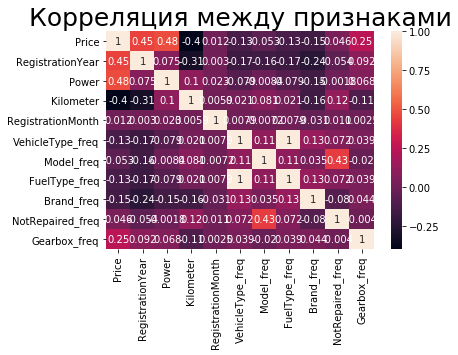

In [39]:
plt.title('Корреляция между признаками', size=25)
hm = sns.heatmap(df_new_nan_final.corr(),
                 cbar=True,
                 annot=True)

In [40]:
def matrix(pic):
    return scatter_matrix(pic, alpha=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f19c28fd0>,
      dtype=object)

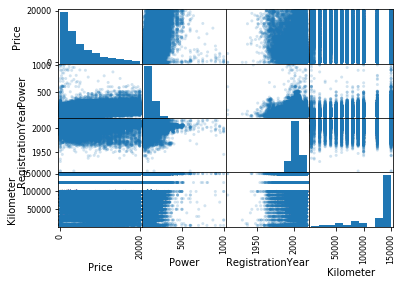

In [41]:
matrix(df_new_nan_final[['Price', 'Power', 'RegistrationYear', 'Kilometer']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f08b36a90>,
      dtype=object)

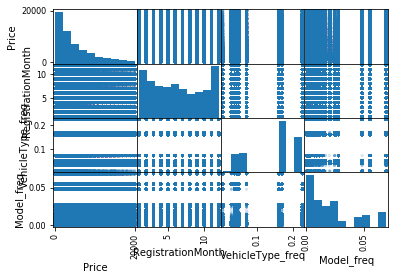

In [42]:
matrix(df_new_nan_final[['Price', 'RegistrationMonth', 'VehicleType_freq', 'Model_freq']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f086e9410>,
      dtype=object)

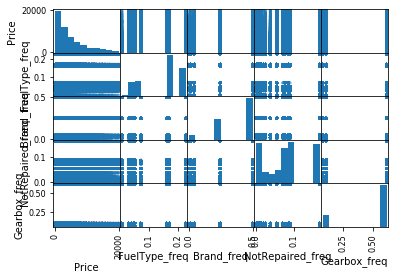

In [43]:
matrix(df_new_nan_final[['Price', 'FuelType_freq', 'Brand_freq', 'NotRepaired_freq', 'Gearbox_freq']])

#### Вывод
<a id="вывод1.4"></a>

Предобработали данные:
 * пропущенные значения заменили на метку 'unknown'
 * удалили выбросы
 * уменьшили почти на 24% процента  память
 * выявили корреляцию между целевым признаком и признаками: максимальный положительный коэффициент корреляции 0,45 и 0,48 у RegistrationYear и Power соответственно, отрицательный коэффициент корреляции -0,4 - Kilometer. Некоторые признаки имееют между собой корреляцию сопоставимую с целевым признаком: 0,43 между Model_freq и NotRepaired_freq и отрицательный коэффициент корреляции -0,31 между RegistrationYear и Kilometer.
 * VehicleType_freq, Model_freq, FuelType_freq, Brand_freq, NotRepaired_freq, Gearbox_freq признаки имеют ненормальное распределение.

### Подготовка данных для работы с моделями.
<a id="подготовка"></a>

Так как спрятанной тестовой выборки у нас нет, разделим исходные данные на три выборки: обучающую, валидационную и тестовую. Так как размеры тестовой и валидационной выборок обычно равны, разделим данные в соотношении 3:1:1.

Для этого методом train_test_split разделим исходные данные на обучающую (70%) и валидационную выборку (30%), а после этого валидационную выборку разделим пополам — на валидационную и тестовую выборки.

In [44]:
features =df_new_nan_final.drop(['Price'], axis=1)# признаки 
target = df_new_nan_final['Price']

In [45]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                    train_size=0.7, random_state=42)

In [46]:
 features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, 
                                                    train_size=0.5, random_state=42)

In [47]:
print('Обучающая выборка', features_train.shape)
print('Валидационная выборка', features_valid.shape)
print('Тестовая выборка', features_test.shape)

Обучающая выборка (197954, 10)
Валидационная выборка (42419, 10)
Тестовая выборка (42419, 10)


Приведем признаки к одному масштабу. Для этого будем использовать структуру для стандартизации данных StandardScaler. Часть признаков у нас уже отмасштабирована, когда мы их кодировали частотным методом. Оставшиеся признаки: RegistrationYear, Power, Kilometer, RegistrationMonth приведем к тому же рабочему диапозону.

In [48]:
numeric = ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(features_train[numeric])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [49]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверим, что получилось

In [50]:
features_train

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_freq,Model_freq,FuelType_freq,Brand_freq,NotRepaired_freq,Gearbox_freq
344274,0.853211,0.025290,1.000000,0.363636,0.169235,0.006482,0.169235,0.497052,0.014908,0.103614
219049,0.853211,0.025290,1.000000,0.909091,0.169235,0.006482,0.169235,0.497052,0.014908,0.619635
7920,0.752294,0.009484,1.000000,0.454545,0.169235,0.068638,0.169235,0.497052,0.167361,0.619635
196865,0.880734,0.052687,1.000000,0.454545,0.160690,0.014138,0.160690,0.497052,0.055079,0.619635
111399,0.834862,0.025290,1.000000,0.363636,0.169235,0.012126,0.169235,0.497052,0.025256,0.619635
...,...,...,...,...,...,...,...,...,...,...
150329,0.871560,0.042150,1.000000,0.363636,0.071872,0.054687,0.071872,0.244767,0.076653,0.619635
324709,0.880734,0.104320,1.000000,0.454545,0.160690,0.009327,0.160690,0.244767,0.085861,0.619635
165444,0.844037,0.025290,1.000000,0.181818,0.160690,0.005302,0.160690,0.497052,0.013909,0.619635
184096,0.688073,0.068493,1.000000,0.636364,0.169235,0.054687,0.169235,0.497052,0.038291,0.619635


Для моделей CatBoostRegressor и LGBMRegressor данные подготовим отдельно.
    
Заменим типы данных на категориальные.

In [51]:
cols_categ = df_new_categ.select_dtypes(include='object').columns
for col in cols_categ:
    df_new_categ[col] = df_new_categ[col].astype('category')

In [52]:
features_train_categ, features_valid_categ, target_train_categ, target_valid_categ = train_test_split(
    df_new_categ.drop('Price', axis=1), df_new_categ.Price, test_size=0.3, random_state=12345)

In [53]:
features_valid_categ, features_test_categ, target_valid_categ, target_test_categ = train_test_split(
    features_valid_categ, target_valid_categ, train_size=0.5, random_state=42)

In [54]:
print('Обучающая выборка', features_train_categ.shape)
print('Валидационная выборка', features_valid_categ.shape)
print('Тестовая выборка', features_test_categ.shape)

Обучающая выборка (197954, 10)
Валидационная выборка (42419, 10)
Тестовая выборка (42419, 10)


In [55]:
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

## Обучение моделей
<a id="обучение"></a>

Обучим следующие модели регрессии:
* LinearRegression - линейной регрессии
* RandomForestRegressor - случайный лес для регрессии
* LGBMRegressor - градиентный бустинг и модель линейной регрессии
* Ridge - гребневая регрессия
* CatBoostRegressor - градиентный бустинг и модели линейной регрессии

Оценим скорость обучения и время затраченое для предсказания, а также предсказания - метрику RMSE.

Напишем функцию для подсчета времени и  расчета метрики  rmse

In [56]:
def time_model(model, feat_tr, targ_tr, feat_val, targ_val):
    start = time.time()

    model_study = model
    model_study.fit(feat_tr, targ_tr)

    end = time.time()
    catboost_time_study = end - start
    
    start = time.time()
    predicted_valid = model_study.predict(feat_val) 
    mse=mean_squared_error(targ_val, predicted_valid)# средняя квадратичная ошибка
    RMSE = mse ** 0.5# квадратный корень из средней квадратичной ошибки
    end = time.time()
    catboost_time_pred = end - start
    return RMSE, catboost_time_study, catboost_time_pred

In [57]:
rmse_LR, time_study_LR, time_pred_LR = time_model(LinearRegression() , features_train, target_train, features_valid, target_valid)

In [58]:
rmse_RFR, time_study_RFR, time_pred_RFR = time_model(RandomForestRegressor() , features_train, target_train, features_valid, target_valid)

In [59]:
rmse_LGBMR, time_study_LGBMR, time_pred_LGBMR = time_model(LGBMRegressor(), 
                                                           features_train_categ, target_train_categ, features_valid_categ, target_valid_categ)

In [60]:
rmse_Rid, time_study_Rid, time_pred_Rid = time_model(Ridge() , features_train, target_train, features_valid, target_valid)

In [61]:
rmse_CBR, time_study_CBR, time_pred_CBR = time_model(CatBoostRegressor(iterations=35, cat_features=cat_features, verbose =False), 
                                                     features_train_categ, target_train_categ, features_valid_categ, target_valid_categ)

In [62]:
model_valid = pd.DataFrame({'Модель': ['LinearRegression','RandomForestRegressor','LGBMRegressor','Ridge', 'CatBoostRegressor'],
                'Параметры': ['-',  '-',  '-',  '-', 'iterations=35'], 
                'Время обучения': [time_study_LR, time_study_RFR, time_study_LGBMR, time_study_Rid, time_study_CBR], 
                'Скорость предсказания': [time_pred_LR,time_pred_RFR, time_pred_LGBMR, time_pred_Rid, time_pred_CBR], 
                'RMSE': [rmse_LR, rmse_RFR, rmse_LGBMR, rmse_Rid, rmse_CBR]})#, index=['LinearRegression','RandomForestRegressor','LGBMRegressor','Ridge'])
model_valid

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE
0,LinearRegression,-,0.074107,0.076812,3109.878835
1,RandomForestRegressor,-,7.793949,0.243969,1766.407720
2,LGBMRegressor,-,7.589327,0.695080,1728.825116
3,Ridge,-,0.017382,0.003012,3109.883982
4,CatBoostRegressor,iterations=35,13.195566,0.071284,2858.178871


### Вывод
<a id="вывод2.1"></a>

Обученные модели на валидационной выборке показали результаты плохие. Метрика RMSE тем лучше, чем ближе она к нулю, поэтому самыми лучшими моделями в порядке ухудшения являются: RandomForestRegressor, LGBMRegressor, CatBoostRegressor, Ridge и LinearRegression.

Время затрачиваемое на обучение и предсказание самое быстрое у Ridge и LinearRegression.
У моделей RandomForestRegressor, CatBoostRegressor,  и LGBMRegressor время затрачиваемое на обучение возрастает.

Скорость предсказания выше у Ridge, LinearRegression, CatBoostRegressor, RandomForestRegressor и LGBMRegressor.

### Подбор параметров
<a id="параметр"></a>

In [63]:
def grid_search(X, y, model, parameters):#функция для автоматического подбора параметров
    model_cv = GridSearchCV(model, parameters, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)#спомощью GridSearchCV подбираем параметры
    model_cv.fit(X, y)#обучаем модель
    return model_cv.best_params_#возвращаем наилучшие параметры

In [64]:
parameters_LR = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}#Отдельно создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем. 
grid_search(features_train, target_train, LinearRegression(), parameters_LR)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [65]:
parameters_RFR = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8],  'max_depth':[2,4,6]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
grid_search(features_train, target_train, RandomForestRegressor(), parameters_RFR)

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [66]:
parameters_LGBMR = {
    'max_depth': [-1, 3, 5],
    'n_estimators': [100, 200]}
grid_search(features_train, target_train,  LGBMRegressor(), parameters_LGBMR)

{'max_depth': -1, 'n_estimators': 200}

In [67]:
parameters_Ridge={'alpha': [25,10, 4, 2, 1, 0.5,0.1, 0.05, 0.01]}
grid_search(features_train, target_train, Ridge(), parameters_Ridge)

{'alpha': 0.1}

In [68]:
parameters_CBR={'iterations': [50, 100],
                'depth': [2,8],
                 'learning_rate' : [0.1,0.5],
                 'verbose': [False]}
grid_search(features_train, target_train, CatBoostRegressor(), parameters_CBR)

{'depth': 8, 'iterations': 100, 'learning_rate': 0.5, 'verbose': False}

## Анализ моделей
<a id="анализ"></a>

In [69]:
rmse_LR_best, time_study_LR_best, time_pred_LR_best = time_model(LinearRegression(
    copy_X = True, fit_intercept = True, normalize = True) , features_train, target_train, features_valid, target_valid)

In [70]:
rmse_RFR_best, time_study_RFR_best, time_pred_RFR_best = time_model(RandomForestRegressor(
    random_state = 42, bootstrap = False, max_features = 3, n_estimators = 10) , features_train, target_train, 
                                                                    features_valid, target_valid)

In [71]:
rmse_LGBMR_best, time_study_LGBMR_best, time_pred_LGBMR_best = time_model(LGBMRegressor(
    random_state = 42, max_depth = -1, n_estimators = 200) , features_train_categ, target_train_categ, 
                                                                          features_valid_categ, target_valid_categ)

In [72]:
rmse_Rid_best, time_study_Rid_best, time_pred_Rid_best = time_model(Ridge(
    random_state = 12345, alpha = 0.01) , features_train, target_train, features_valid, target_valid)

In [73]:
rmse_CBR_best, time_study_CBR_best, time_pred_CBR_best = time_model(CatBoostRegressor(
    random_state = 42, depth = 8, iterations = 100, learning_rate = 0.5, cat_features=cat_features, verbose = False) , features_train_categ, 
                                                                    target_train_categ, features_valid_categ, target_valid_categ)

In [74]:
model_valid = pd.DataFrame({'Модель': ['LinearRegression','RandomForestRegressor','LGBMRegressor','Ridge', 'CatBoostRegressor'],
                'Параметры':  ['copy_X = True, fit_intercept = True, normalize = False', 'random_state = 42, bootstrap = False, max_features = 3, n_estimators = 10',
                              'random_state = 42, max_depth = -1, n_estimators = 200',  'random_state = 12345, alpha = 0.01', 'random_state = 42, iterations = 100, depth = 2, loss_function = "RMSE", verbose = False'], 
                'Время обучения': [time_study_LR_best, time_study_RFR_best, time_study_LGBMR_best, time_study_Rid_best, time_study_CBR_best], 
                'Скорость предсказания': [time_pred_LR_best,time_pred_RFR_best, time_pred_LGBMR_best, time_pred_Rid_best, time_pred_CBR_best], 
                'RMSE': [rmse_LR, rmse_RFR, rmse_LGBMR, rmse_Rid, rmse_CBR],
                'RMSE_best': [rmse_LR_best, rmse_RFR_best, rmse_LGBMR_best, rmse_Rid_best, rmse_CBR_best]})
model_valid

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE,RMSE_best
0,LinearRegression,"copy_X = True, fit_intercept = True, normalize...",0.049633,0.011526,3109.878835,3109.878835
1,RandomForestRegressor,"random_state = 42, bootstrap = False, max_feat...",4.805545,0.277824,1766.407720,1792.356689
2,LGBMRegressor,"random_state = 42, max_depth = -1, n_estimator...",13.405577,1.301669,1728.825116,1692.331141
3,Ridge,"random_state = 12345, alpha = 0.01",0.016318,0.002983,3109.883982,3109.878859
4,CatBoostRegressor,"random_state = 42, iterations = 100, depth = 2...",41.973670,0.045862,2858.178871,1732.157121


Сравним качество предсказаний моделей с подобранными параметрами, наилучшей моделью является LGBMRegressor, затем по мере ухудшения метрики RMSE CatBoostRegressor, RandomForestRegressor, Ridge и 
LinearRegression.

Время затрачиваемое на обучение и предсказание самое быстрое у Ridge и LinearRegression.

RandomForestRegressor  обучается быстрее, чем LGBMRegressor и CatBoostRegressor.

Скорость предсказания выше у LinearRegression, CatBoostRegressor, Ridge, RandomForestRegressor и LGBMRegressor.

Модель LGBMRegressor является наилучшей среди рассматриваемых моделей, т.к. метрика RMSE самая минимальная, скорость предсказания из рассматриваемых моделей самая медленная, обучаемость не самое длительное. Однако, затрачиваемое время на обучение не критично длительное.

Сравним качество наших моделей с работой фиктивной модели.

In [75]:
dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(features_train, target_train)
predicted_regr_dummy = dummy_regr.predict(features_test)
mse_dummy = mean_squared_error(target_test, predicted_regr_dummy)# средняя квадратичная ошибка
RMSE_dummy  = mse_dummy ** 0.5
print('RMSE_dummy:', RMSE_dummy )

RMSE_dummy: 4643.106044207798


Все модели работают лучше чем фиктивная модель.

### Проверяем на тестовых данных
<a id="тест"></a>

In [76]:
rmse_LR_test, time_study_LR_test, time_pred_LR_test = time_model(LinearRegression(
    copy_X = True, fit_intercept = True, normalize = True) , features_train, target_train, features_test, target_test)

In [77]:
rmse_RFR_test, time_study_RFR_test, time_pred_RFR_test = time_model(RandomForestRegressor(
    random_state=42, bootstrap = False, max_features = 3, n_estimators = 10) , features_train, target_train, 
                                                                    features_test, target_test)

In [78]:
rmse_LGBMR_test, time_study_LGBMR_test, time_pred_LGBMR_test = time_model(LGBMRegressor(
    max_depth = -1, n_estimators = 200, random_state=42) , features_train_categ, target_train_categ, 
                                                                          features_test_categ, target_test_categ)

In [79]:
rmse_Rid_test, time_study_Rid_test, time_pred_Rid_test = time_model(Ridge(
    random_state=42, alpha = 0.01) , features_train, target_train, features_test, target_test)

In [80]:
rmse_CBR_test, time_study_CBR_test, time_pred_CBR_test = time_model(CatBoostRegressor(
    random_state=42, depth = 8, iterations = 100, learning_rate = 0.5, cat_features=cat_features, verbose = False) , features_train_categ, 
                                                                    target_train_categ, features_test_categ, target_test_categ)

In [81]:
model_test = pd.DataFrame({'Модель': ['LinearRegression', 'RandomForestRegressor', 'LGBMRegressor', 'Ridge', 'CatBoostRegressor'],
                'Параметры':  ['copy_X = True, fit_intercept = True, normalize = False', 
                               'random_state = 42, bootstrap = False, max_features = 3, n_estimators = 10',
                              'random_state = 42, max_depth = -1, n_estimators = 200',  'random_state = 12345, alpha = 0.01', 
                               'random_state = 42, iterations = 100, depth = 2, loss_function = "RMSE", verbose = False'], 
                'Время обучения': [time_study_LR_test, time_study_RFR_test, time_study_LGBMR_test, time_study_Rid_test, time_study_CBR_test], 
                'Скорость предсказания': [time_pred_LR_test, time_pred_RFR_test, time_pred_LGBMR_test, time_pred_Rid_test, time_pred_CBR_test], 
                'RMSE_test': [rmse_LR_test, rmse_RFR_test, rmse_LGBMR_test, rmse_Rid_test, rmse_CBR_test]})
model_test

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE_test
0,LinearRegression,"copy_X = True, fit_intercept = True, normalize...",0.090466,0.005246,3130.436701
1,RandomForestRegressor,"random_state = 42, bootstrap = False, max_feat...",5.500592,0.302946,1796.128018
2,LGBMRegressor,"random_state = 42, max_depth = -1, n_estimator...",12.774690,1.311314,1669.305920
3,Ridge,"random_state = 12345, alpha = 0.01",0.085894,0.003168,3130.436564
4,CatBoostRegressor,"random_state = 42, iterations = 100, depth = 2...",41.866259,0.047181,1719.649104


На тестовых данных модели распределись следующим образом:
* предсказание: LGBMRegressor, CatBoostRegressor, RandomForestRegressor, Ridge и LinearRegression
* скорость обучения: LinearRegression, Ridge, RandomForestRegressor,  LGBMRegressor и CatBoostRegressor
* скорость предсказания: Ridge, LinearRegression, CatBoostRegressor, RandomForestRegressor и LGBMRegressor

### Проверяем на полных данных.
<a id="массив"></a>

In [82]:
features_all = pd.concat([features_train, features_valid])
features_all = pd.concat([features_all, features_test])

In [83]:
target_all = pd.concat([target_train, target_valid])
target_all = pd.concat([target_all, target_test])

In [84]:
features_categ_all = pd.concat([features_train_categ, features_valid_categ])
features_categ_all = pd.concat([features_categ_all, features_test_categ])
target_categ_all = pd.concat([target_train_categ, target_valid_categ])
target_categ_all = pd.concat([target_categ_all, target_test_categ])

In [85]:
rmse_LR_all, time_study_LR_all, time_pred_LR_all = time_model(LinearRegression(
    copy_X = True, fit_intercept = True, normalize = True) , features_train, target_train, features_all, target_all)

In [86]:
rmse_RFR_all, time_study_RFR_all, time_pred_RFR_all = time_model(RandomForestRegressor(
    bootstrap = False, max_features = 4, n_estimators = 10) , features_train, target_train, features_all, target_all)

In [87]:
rmse_LGBMR_all, time_study_LGBMR_all, time_pred_LGBMR_all = time_model(LGBMRegressor(
    max_depth = -1, n_estimators = 200, random_state=19072020) , features_train_categ, target_train_categ, features_categ_all, target_categ_all)

In [88]:
rmse_Rid_all, time_study_Rid_all, time_pred_Rid_all = time_model(Ridge(
    alpha = 25) , features_train, target_train, features_all, target_all)

In [89]:
rmse_CBR_all, time_study_CBR_all, time_pred_CBR_all = time_model(CatBoostRegressor(
    depth = 8, iterations = 100, learning_rate = 0.5, cat_features=cat_features, verbose = False) , 
                                                                 features_train_categ, target_train_categ, features_categ_all, target_categ_all)

In [90]:
model_all = pd.DataFrame({'Модель': ['LinearRegression', 'RandomForestRegressor', 'LGBMRegressor', 'Ridge', 'CatBoostRegressor'],
                'Параметры':  ['copy_X = True, fit_intercept = True, normalize = False', 
                               'random_state = 42, bootstrap = False, max_features = 3, n_estimators = 10',
                              'random_state = 42, max_depth = -1, n_estimators = 200',  'random_state = 12345, alpha = 0.01', 
                               'random_state = 42, iterations = 100, depth = 2, loss_function = "RMSE", verbose = False'], 
                'Время обучения': [time_study_LR_all, time_study_RFR_all, time_study_LGBMR_all, time_study_Rid_all, time_study_CBR_all], 
                'Скорость предсказания': [time_pred_LR_all, time_pred_RFR_all, time_pred_LGBMR_all, time_pred_Rid_all, time_pred_CBR_all], 
                'RMSE_test': [rmse_LR_test, rmse_RFR_test, rmse_LGBMR_test, rmse_Rid_test, rmse_CBR_test],
                'RMSE_all': [rmse_LR_all, rmse_RFR_all, rmse_LGBMR_all, rmse_Rid_all, rmse_CBR_all]})
model_all

,Модель,Параметры,Время обучения,Скорость предсказания,RMSE_test,RMSE_all
0,LinearRegression,"copy_X = True, fit_intercept = True, normalize...",0.054423,0.009322,3130.436701,3107.936681
1,RandomForestRegressor,"random_state = 42, bootstrap = False, max_feat...",5.971238,1.908719,1796.128018,1100.654758
2,LGBMRegressor,"random_state = 42, max_depth = -1, n_estimator...",15.292697,8.527776,1669.305920,1637.178173
3,Ridge,"random_state = 12345, alpha = 0.01",0.065454,0.008830,3130.436564,3109.456906
4,CatBoostRegressor,"random_state = 42, iterations = 100, depth = 2...",42.228123,0.477147,1719.649104,1670.938459


На тестовых наилучшими моделями являются RandomForestRegressor, LGBMRegressor  и CatBoostRegressor, т.е. метрика RMSE 1101,9, 1637,1 и 1670,9, скорость обучения 6,1, 13,09 и 41,28 с, скорость предсказания 1,71, 9,13 и 0,43 с.

## Вывод
<a id="вывод"></a>

В данной работе были рассмотрены разные модели для предсказания рыночной стоимости автомобиля по историческим данным: технические характеристики, комплектации и цены автомобилей.

Для этого представленные данные были:
* аналитически обработаны: часть пропущенных значений была удалена, часть заменена на метку 'unknown', повторяющиеся данные,  выбросы в  "RegistrationYear "  и "Power " также были удалены.
* была проведена кодировка с последующим масштабированием данных.
* рассмотрены модели: LinearRegression, RandomForestRegressor, LGBMRegressor, Ridge и  CatBoostRegressor.
* были подобраны гиперпараметры для данных моделей.
* были рассчитаны скорости обучения, предсказания и метрика качества предсказания RMSE.

Следует отметить, что все модели имеют низкий показатель качества предсказания. Для улучшения качества работы моделей, необходимо подобрать другие гиперпараметры и улучшить метрику RMSE максимально приблизив ее к нулю.

В работе показано, что наилучшими моделями являются **RandomForestRegressor**, **LGBMRegressor**  **CatBoostRegressor** , т.к. у них наименьшие метрики RMSE и хотя время обучения занимает длительное время по сравнению с другими моделями, предсказание занимает время 1,71, 9,13 и 0,43 с. соответственно.

## Чек-лист проверки
<a id="лист"></a>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей